# WeatherPy

### Written description of three observable trends based on the data:
* There is a downward trend in temperature if the latitude increases from 0 (the equator) to 90 and there is an upward trend in temperature if the latitude increases from -90 (South Pole) to 0. In other words, the closer away a place is from the equator the higher the temperature becomes. 
* The wind speed appears to slowly increase as the latitudes go further away from the the equator (0 latitude). The values are tightly packed together on winds under 15 mph when the latitudes are closer to the equator.
* Cloudiness does not appear to have a significant relationship with latitude levels. The values were scattered randomly throughout the latitudes. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print('Beginning Data Retrieval')
print('-----------------------------')
# Get weather data

#Set up lists to hold reponse info

record_number = 1
set_number = 1
city_data = []
for i, city in enumerate(cities):
    if (i %50 == 0 and i >= 50 ):
        set_number +=1 
        record_number =0
    print(f'Processing Record {record_number} of Set {set_number} | {city}' )
    record_number +=1
    try:
        weather_response = requests.get(query_url + city).json()

        cloudiness = weather_response['clouds']['all']
        country = weather_response['sys']['country']
        date = weather_response['dt']
        humidity = weather_response['main']['humidity']
        lat = weather_response['coord']['lat']
        lng = weather_response['coord']['lon']
        max_tem = weather_response['main']['temp_max']
        wind_speed = weather_response['wind']['speed']
        city_data.append({ "City": city,
                           "Cloudiness": cloudiness,
                            "Country": country,
                            "Date": date,
                            "Humidity": humidity,
                            "Lat": lat,
                            "Lng":lng,
                            "Max Temp": max_tem,
                            "Wind Speed": wind_speed})
    except:
        print('city not found. Skipping city')
        pass
# Inform that Data Retrieval was Completed
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | norman wells
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | maragogi
Processing Record 7 of Set 1 | praia
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | severo-kurilsk
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | barentsburg
city not found. Skipping city
Processing Record 13 of Set 1 | bambous virieux
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | muros
Processing Record 16 of Set 1 | biak
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | nome
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | puerto escondido
Processing Record 22 of Set 1 | upernavik
Proce

Processing Record 36 of Set 4 | sitio novo do tocantins
Processing Record 37 of Set 4 | port elizabeth
Processing Record 38 of Set 4 | uarini
Processing Record 39 of Set 4 | grand centre
city not found. Skipping city
Processing Record 40 of Set 4 | bathsheba
Processing Record 41 of Set 4 | tommot
Processing Record 42 of Set 4 | poum
Processing Record 43 of Set 4 | dingle
Processing Record 44 of Set 4 | gurupi
Processing Record 45 of Set 4 | mikun
Processing Record 46 of Set 4 | mesagne
Processing Record 47 of Set 4 | ancud
Processing Record 48 of Set 4 | tunduru
city not found. Skipping city
Processing Record 49 of Set 4 | makakilo city
Processing Record 0 of Set 5 | sur
Processing Record 1 of Set 5 | bengkulu
Processing Record 2 of Set 5 | san patricio
Processing Record 3 of Set 5 | bijie
Processing Record 4 of Set 5 | caridad
Processing Record 5 of Set 5 | thompson
Processing Record 6 of Set 5 | ozgon
city not found. Skipping city
Processing Record 7 of Set 5 | alekseyevsk
Processing

Processing Record 26 of Set 8 | kaabong
Processing Record 27 of Set 8 | okitipupa
Processing Record 28 of Set 8 | looc
Processing Record 29 of Set 8 | mezen
Processing Record 30 of Set 8 | leh
Processing Record 31 of Set 8 | aykhal
Processing Record 32 of Set 8 | patan
Processing Record 33 of Set 8 | saint-francois
Processing Record 34 of Set 8 | amberley
Processing Record 35 of Set 8 | umm kaddadah
Processing Record 36 of Set 8 | zunyi
Processing Record 37 of Set 8 | vaitupu
city not found. Skipping city
Processing Record 38 of Set 8 | basco
Processing Record 39 of Set 8 | denpasar
Processing Record 40 of Set 8 | pacific grove
Processing Record 41 of Set 8 | kang
Processing Record 42 of Set 8 | beringovskiy
Processing Record 43 of Set 8 | omboue
Processing Record 44 of Set 8 | trinidad
Processing Record 45 of Set 8 | grand gaube
Processing Record 46 of Set 8 | sentyabrskiy
city not found. Skipping city
Processing Record 47 of Set 8 | maloshuyka
city not found. Skipping city
Processing

Processing Record 16 of Set 12 | naze
Processing Record 17 of Set 12 | langarud
Processing Record 18 of Set 12 | tezu
Processing Record 19 of Set 12 | ostrogozhsk
Processing Record 20 of Set 12 | auki
Processing Record 21 of Set 12 | turtkul
city not found. Skipping city
Processing Record 22 of Set 12 | xinqing
Processing Record 23 of Set 12 | ranong
Processing Record 24 of Set 12 | los algarrobos
Processing Record 25 of Set 12 | coronado
Processing Record 26 of Set 12 | labuhan
Processing Record 27 of Set 12 | pec
Processing Record 28 of Set 12 | tianpeng
Processing Record 29 of Set 12 | los llanos de aridane
Processing Record 30 of Set 12 | macaboboni
city not found. Skipping city
Processing Record 31 of Set 12 | pathein
Processing Record 32 of Set 12 | leeton
Processing Record 33 of Set 12 | san francisco
Processing Record 34 of Set 12 | slupsk
Processing Record 35 of Set 12 | xichang
Processing Record 36 of Set 12 | vanimo
Processing Record 37 of Set 12 | panaba
Processing Record 3

In [5]:
# Create a data frame 
weather_df = pd.DataFrame(city_data)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df.to_csv("../output/weather_cities.csv", encoding='utf-8', index=False)

In [7]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,avarua,75,CK,1619849483,83,-21.2078,-159.7750,77.00,4.61
1,nikolskoye,0,RU,1619849483,65,59.7035,30.7861,42.01,6.71
2,norman wells,20,CA,1619849483,52,65.2820,-126.8329,37.40,5.75
3,faanui,91,PF,1619849216,69,-16.4833,-151.7500,81.45,7.65
4,khatanga,100,RU,1619849484,97,71.9667,102.5000,33.30,9.15


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
new_coders = "../output/weather_cities.csv"

In [8]:
#Verify if there are any cities with humidity>100%
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,576.000000,5.760000e+02,576.000000,576.000000,576.000000,576.000000,576.000000
mean,54.777778,1.619813e+09,69.256944,19.624795,20.989120,61.897691,7.380556
std,39.260945,7.882767e+01,22.977341,33.386736,90.625164,20.040379,5.274120
min,0.000000,1.619813e+09,4.000000,-54.800000,-179.166700,3.880000,0.270000
25%,15.000000,1.619813e+09,55.000000,-8.778975,-54.812075,48.200000,3.440000
50%,62.000000,1.619813e+09,76.000000,21.404050,26.173450,66.200000,5.820000
75%,98.000000,1.619813e+09,87.000000,48.853025,100.340125,78.505000,10.307500
max,100.000000,1.619813e+09,100.000000,78.218600,179.316700,97.930000,32.210000


In [12]:
#Remove the cities where the humidity > 100% and create DataFrame
humidity_cities = weather_df.loc[weather_df["Humidity"] <= 100, :]
# Make a new DataFrame to drop all humidity outliers
n_weather_df = pd.DataFrame(city_data)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [4]:
# For printing current day (mm/dd/YY)
today = date.today()
d1 = today.strftime("%m/%d/%Y")

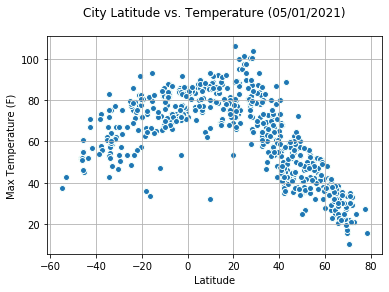

In [37]:
# Create a dataset:
df_temp=pd.DataFrame({'x_values': n_weather_df['Lat'], 'y_values': n_weather_df['Max Temp'] })
# plot
plt.scatter('x_values', 'y_values', data=df_temp, marker='o', edgecolors= 'mintcream')
plt.title(f"City Latitude vs. Temperature ({d1})", pad = 20)
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig("Images/LatvsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

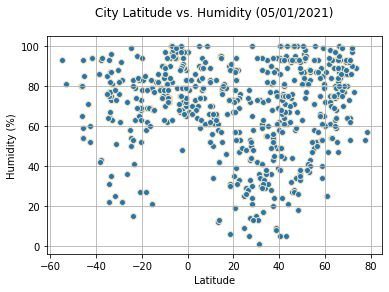

In [38]:
# Create a dataset:
df_hum=pd.DataFrame({'x_values': n_weather_df['Lat'], 'y_values': n_weather_df['Humidity'] })
# plot
plt.scatter( 'x_values', 'y_values', data=df_hum, marker='o', edgecolors= 'wheat')
plt.title(f"City Latitude vs. Humidity ({d1})", pad = 20)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
# Show plot
plt.savefig("Images/LatvsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

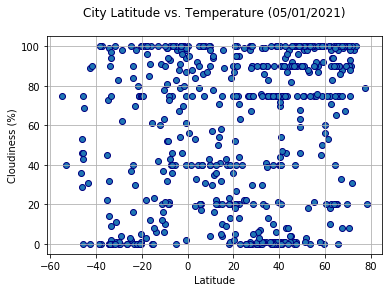

In [39]:
# Create a dataset:
df_cloud=pd.DataFrame({'x_values': n_weather_df['Lat'], 'y_values': n_weather_df['Cloudiness'] })
# plot
plt.scatter( 'x_values', 'y_values', data=df_cloud, marker='o', edgecolors= 'navy')
plt.title(f"City Latitude vs. Temperature ({d1})", pad = 20)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
# Show plot
plt.savefig("Images/LatvsCloudiness.png")
plt.show()



## Latitude vs. Wind Speed Plot

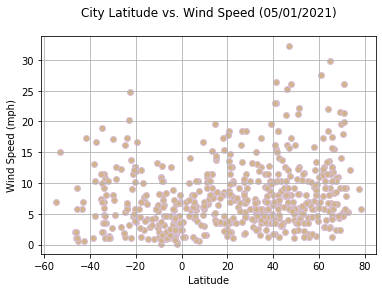

In [40]:
# Create a dataset:
df_wind=pd.DataFrame({'x_values': n_weather_df['Lat'], 'y_values': n_weather_df['Wind Speed'] })
# plot
plt.scatter('x_values', 'y_values', data=df_wind, marker='o', edgecolors= 'thistle', color = 'tan')
plt.title(f"City Latitude vs. Wind Speed ({d1})", pad = 20)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
# Show plot
plt.savefig("Images/LatvsWindspeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

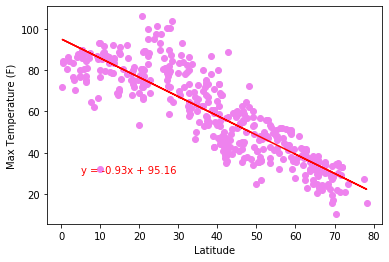

The r-value is: -0.8609750550795624


In [74]:
north_df=  n_weather_df.loc[n_weather_df['Lat'] >= 0]
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='violet')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (5,30),color='r', fontsize=10)
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.savefig("Images/LinearLatvsTemp.png")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

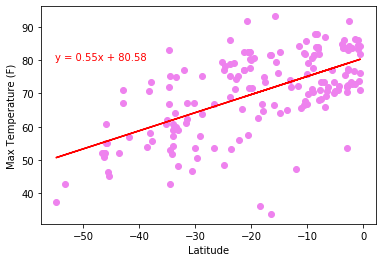

The r-value is: 0.614899430367611


In [73]:
south_df=  n_weather_df.loc[n_weather_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='violet')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-55,80),color='r', fontsize=10)
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.savefig("Images/LinearLatvsTemp_South.png")
plt.show()
print(f"The r-value is: {rvalue}")

#### Analysis : 
There is a strong linear relationship with the Temperature and Latitude in both Sothern and Northen Hemisphere.
Therefore, it can be inferred from both graphs that the closer a place is from the equator (latitude = 0) the warmer the place will be. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

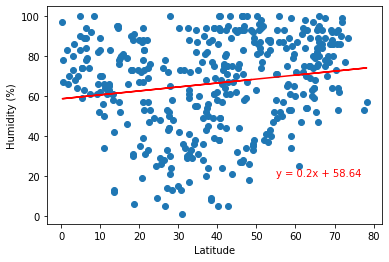

The r-value is: 0.16606860211931868


In [75]:
north_df=  n_weather_df.loc[n_weather_df['Lat'] >= 0]
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (55,20), color='r', fontsize=10)
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.savefig("Images/LineraLatvsHumidity_North.png")
plt.show()
print(f"The r-value is: {rvalue}")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

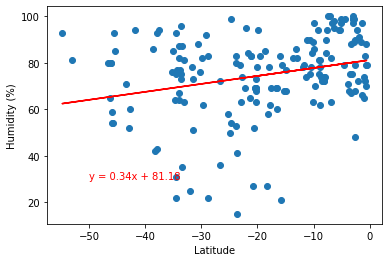

The r-value is: 0.2656092866968396


In [76]:
south_df=  n_weather_df.loc[n_weather_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,30),color='r', fontsize=10)
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.savefig("Images/LineraLatvsHumidity_South.png")
plt.show()
print(f"The r-value is: {rvalue}")


#### Analysis : 
Because the r-values of the Humidity (%) vs. Latitude linear regression are between 0.1 and 0.2 it can be said that the linear relationship between the Humidity and the Latitude in the southern and northen hemisphere is a is a weak positive relationship. 


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

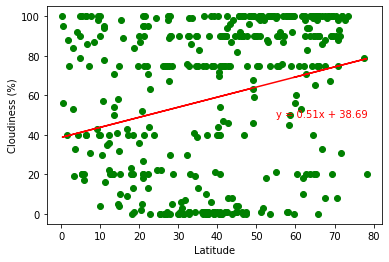

The r-value is: 0.2643928036862914


In [77]:
north_df=  n_weather_df.loc[n_weather_df['Lat'] >= 0]
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='green')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (55,49),color='r', fontsize=10)
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.savefig("Images/LineraLatvsCloudiness_North.png")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

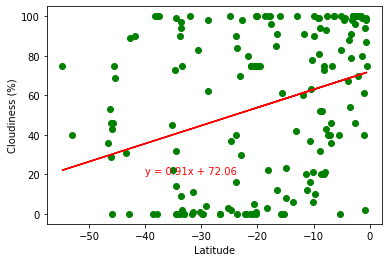

The r-value is: 0.32642184645156846


In [78]:
south_df=  n_weather_df.loc[n_weather_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color='g')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-40,20),color='r', fontsize=10)
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.savefig("Images/LineraLatvsCloudiness_South.png")
plt.show()
print(f"The r-value is: {rvalue}")

#### Analysis :
Because the r-value is between 0 and 0.2 in both graphs, it can be said that the relationship between the Cloudiness percentage and the Latitude is very weak.  
Meaning that the correlation between the cloudiness percentage and the Latidude is negligible. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

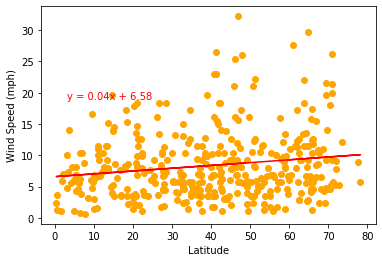

The r-value is: 0.16469360927011434


In [79]:
north_df=  n_weather_df.loc[n_weather_df['Lat'] >= 0]
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='orange')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (3,19),color='r', fontsize=10)
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.savefig("Images/LineraLatvsWind_North.png")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

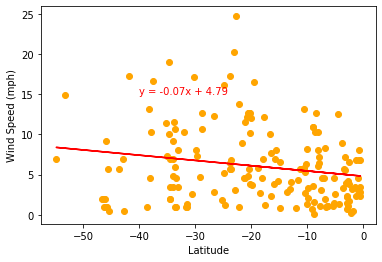

The r-value is: -0.19354297924668848


In [80]:
south_df= n_weather_df.loc[n_weather_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='orange')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-40,15),color='r', fontsize=10)
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.savefig("Images/LineraLatvsWind_South.png")
plt.show()
print(f"The r-value is: {rvalue}")

#### Analysis : 
Because the r-values for the Wind Speed (mph) vs. Latitude Linear Regression are between -0.015 and -0.29 it can be inferred that there is a weak negative linear relationship between the Latitude and the wind speed.

### BONUS

In [87]:
def regression( xvalues , yvalues, color, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xvalues,yvalues, color= color)
    plt.plot(xvalues,regress_values,"b-")
    plt.annotate(line_eq, (-50,10),color='b', fontsize=10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig("Images/LineraLatvsWind_South_Bonus.png")
    plt.show()
    

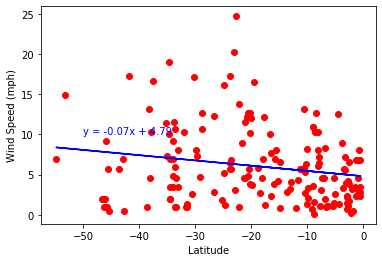

In [88]:
regression( south_df['Lat'],south_df['Wind Speed'], 'red',"Latitude", 'Wind Speed (mph)'  )